# Project: Questionary Data with Pandas (Star Wars)

## Questions to address:
- Process questionary data using Pandas
- What is the preferred Star wars movie
- What is the most seen Star wars movie
- Examine preference by gender

<br>

## Tools:
- df.mean(), df.sum(), dataframe indexing
- bar plots

<br>

### load defaults

In [28]:
import pandas as pd
import re
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib import rcParams

from functions import *

plt.rcParams.update({'axes.titlepad': 20, 'font.size': 12, 'axes.titlesize':20})

colors = [(0/255,107/255,164/255), (255/255, 128/255, 14/255), 'red', 'green']
Ncolors = 10
color_map = plt.cm.Blues_r(np.linspace(0.2, 0.5, Ncolors))

<br>

## Dataset: Online survey about what Americans eat for Thanksgiving dinner

In [42]:
star_wars = pd.read_csv("./data/star_wars.csv", encoding="ISO-8859-1")
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]

display(star_wars.iloc[:3,-6:])

,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,No,Male,18-29,NaN,High school degree,South Atlantic
2,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. 

<br>

## Data Cleaning


### Change Yes or No answers from str to boolean

In [43]:
column_one = 'Have you seen any of the 6 films in the Star Wars franchise?'
column_two = 'Do you consider yourself to be a fan of the Star Wars film franchise?'

#change results from str to Boolean
yes_no = {'Yes': True, 
          'No': False}
star_wars[column_one]=star_wars[column_one].map(yes_no)
star_wars[column_two]=star_wars[column_two].map(yes_no)

print(star_wars[column_one].value_counts())
print(star_wars[column_two].value_counts())

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


<br>

### Clean up check box columns

Columns 3 to 9 represent a single checkbox question. Which of the following Star Wars films have you seen? 

For each column, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't see the movie. 

- Convert the values using map function and dictionary:
{ "Star Wars: Episode I  The Phantom Menace": True,
    NaN: False}

- Next, rename the columns to seen1 to seen6

In [44]:
answers = ['Star Wars: Episode I  The Phantom Menace', 
           'Star Wars: Episode II  Attack of the Clones', 
           'Star Wars: Episode III  Revenge of the Sith',
           'Star Wars: Episode IV  A New Hope',
           'Star Wars: Episode V The Empire Strikes Back',
           'Star Wars: Episode VI Return of the Jedi']

idy=0
for idx in range(3,9):  
    #convert string to boolean
    yes_no = {answers[idy]: True, np.nan: False}     
    col = star_wars.columns[idx]    
    star_wars[col] = star_wars[col].map(yes_no)
    
    #rename columns to seen1 to seen6
    idy+=1
    star_wars = star_wars.rename(columns={col : 'seen'+str(idy)})
    
display(star_wars.iloc[:3,3:9])

,seen1,seen2,seen3,seen4,seen5,seen6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False


<br>

### Clean up columns ranking the 6 movies

Columns 9 to 15 ask the respondent to rank the Star Wars movies (1-favorite, 6-least favorite). 
- We'll convert each column to a numeric type
- Then rename the columns to ranking_1 to ranking_6

In [45]:
#convert to float
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

idy=1
for idx in range(9,15): 
    #rename
    star_wars = star_wars.rename(columns={star_wars.columns[idx] : 'ranking_'+str(idy)})
    idy+=1
   
display(star_wars.iloc[:3,9:15])

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0


<br>

## Analysis:


### Q1: Compute the mean value for the ranking of each movie

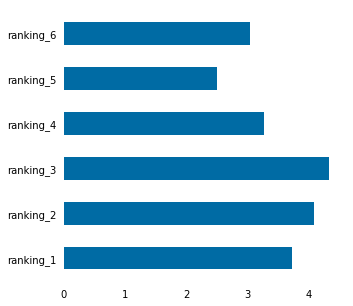

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

cols=[]
for idx in range(1,7):
    cols.append('ranking_'+str(idx))
    
#df.mean
rankings = star_wars[cols].mean()

#horizontal bar plot
fig, ax = plt.subplots(figsize=(5,5))

bar_pos = np.arange(0,len(rankings),1)+0.75
bar_widths = rankings
ax.barh(bar_pos, bar_widths, height=0.5, color=colors[0])

ax.set_yticks(bar_pos)
ax.set_yticklabels(cols)
for key, spine in ax.spines.items():
    spine.set_visible(False)
ax.tick_params(left=False, right=False, top=False, bottom=False)

plt.show()

- Episode III,  Revenge of the Sith, is the preferred movie

<br>

### Q2: Compute the fraction of people that watched each movie

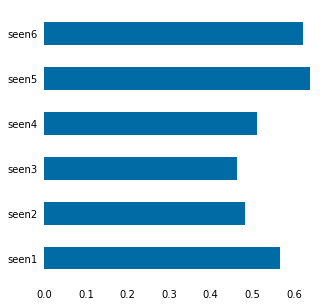

In [50]:
cols=[]
for idx in range(1,7):
    cols.append('seen'+str(idx))
    
seen_count = star_wars[cols].sum()/len(star_wars[cols])

fig, ax = plt.subplots(figsize=(5,5))

bar_pos = np.arange(0,len(seen_count),1)+0.75
bar_widths = seen_count
ax.barh(bar_pos, bar_widths, height=0.5, color=colors[0])

ax.set_yticks(bar_pos)
ax.set_yticklabels(cols)
for key, spine in ax.spines.items():
    spine.set_visible(False)
ax.tick_params(left=False, right=False, top=False, bottom=False)
    
plt.show()

- Episode V, The Empire Strikes Back, is the most seen

<br>

### Q3: Examine rankings and most seen movies for males and females 

There are several columns that segment our data into two groups. Here are a few examples:
- Do you consider yourself to be a fan of the Star Wars film franchise? - True or False
- Do you consider yourself to be a fan of the Star Trek franchise? - Yes or No
- Gender - Male or Female

In [51]:
def ranks_and_seen_count(gender):
    if(gender=='Male'):
        df = star_wars[star_wars['Gender'] == 'Male']
    elif(gender=='Female'):
        df = star_wars[star_wars['Gender'] == 'Female']

    cols=[]
    for idx in range(1,7):
        cols.append('ranking_'+str(idx))
    rankings = df[cols].mean()

    cols=[]
    for idx in range(1,7):
        cols.append('seen'+str(idx))    
    seen_count = df[cols].sum()
    
    return rankings, seen_count


(rankings, seen_count) = ranks_and_seen_count('Male')
print('highest male counts')
print(rankings.idxmax(), ':', rankings.max(), '  ', 
      seen_count.idxmax(), ':', seen_count.max())
print('\nlowest male counts')
print(rankings.idxmin(), ':', rankings.min(), '  ', 
      seen_count.idxmin(), ':', seen_count.min())

(rankings, seen_count) = ranks_and_seen_count('Female')
print('\nhighest Female counts')
print(rankings.idxmax(), ':', rankings.max(), '  ', 
      seen_count.idxmax(), ':', seen_count.max())
(rankings, seen_count) = ranks_and_seen_count('Female')
print('\nlowest Female counts')
print(rankings.idxmin(), ':', rankings.min(), '  ', 
      seen_count.idxmin(), ':', seen_count.min())

highest male counts
ranking_3 : 4.274881516587678    seen5 : 392

lowest male counts
ranking_5 : 2.458628841607565    seen3 : 317

highest Female counts
ranking_3 : 4.418136020151134    seen5 : 353

lowest Female counts
ranking_5 : 2.5692695214105794    seen3 : 222


Potential next steps:

- segment the data based on columns like Education, Location (Census Region), and Which character shot first?
- Clean up columns 15 to 29, which contain data on the characters respondents view favorably and unfavorably.
- Which character do respondents like the most?
- Which character is the most controversial (split between likes and dislikes)?